In [2]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
col_Names=["buying","maint","doors","persons","lug_boot","safety","class"]

In [4]:
# reading the dataset
data = pd.read_csv("C:\\Users\\HP\\Desktop\\DATA SCIENCE\\MACHINE LEARNING NOTES\\car.data.txt",sep = ",",names=col_Names)

In [5]:
data.shape

(1728, 7)

In [6]:
print(data.head())  # head method show only first 5 rows
print(data.describe())
print(data.info())
print(data.columns)

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
       buying  maint  doors persons lug_boot safety  class
count    1728   1728   1728    1728     1728   1728   1728
unique      4      4      4       3        3      3      4
top     vhigh  vhigh  5more       2      big    med  unacc
freq      432    432    432     576      576    576   1210
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB
None
Inde

In [7]:
#missing values
data.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [8]:
X= data.iloc[:,0:6]
y=data.iloc[:,6]

In [9]:
X= pd.get_dummies(X, drop_first=True)
X.head()

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0
1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1


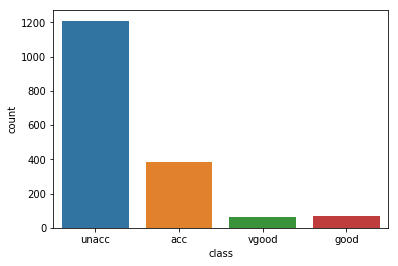

In [10]:
#count plot
sns.countplot(y,label="Count")

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score
# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
#DesicionTree
#importing modules
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
#making the instance
model= DecisionTreeClassifier(random_state=1234)
#Hyper Parameters Set
params = {'criterion':['gini','entropy'],
          'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:",model1.best_params_)
#Prediction
y_pred_1=model1.predict(X_test)
y_pred_2=model1.predict(X_train)

print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))


Best Hyper Parameters: {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 123}
****** report on test data********************************
0.7552986512524085
[[ 77  13  46   9]
 [ 10   2   3   8]
 [ 26   3 309   3]
 [  5   1   0   4]]
             precision    recall  f1-score   support

        acc       0.65      0.53      0.59       145
       good       0.11      0.09      0.10        23
      unacc       0.86      0.91      0.88       341
      vgood       0.17      0.40      0.24        10

avg / total       0.76      0.76      0.75       519

****** report on train  data********************************
0.9181141439205955
[[266  16  55  15]
 [  0  34   5   6]
 [  0   0 792   2]
 [  0   0   0  18]]
             precision    recall  f1-score   support

        acc       1.00      0.76      0.86       352
       good       0.68      0.76      0.72        45
      unacc       0.93      1.00      0.96       794
      vgood      

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=123)
clf.fit(X_train,y_train)
y_pred_1=clf.predict(X_test)f
y_pred_2=clf.predict(X_train)

print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))


****** report on test data********************************
0.8998073217726397
[[ 85   4   8   2]
 [ 10  13   0   3]
 [ 16   2 350   0]
 [  7   0   0  19]]
             precision    recall  f1-score   support

        acc       0.72      0.86      0.78        99
       good       0.68      0.50      0.58        26
      unacc       0.98      0.95      0.96       368
      vgood       0.79      0.73      0.76        26

avg / total       0.90      0.90      0.90       519

****** report on train  data********************************
1.0
[[266   0   0   0]
 [  0  50   0   0]
 [  0   0 852   0]
 [  0   0   0  41]]
             precision    recall  f1-score   support

        acc       1.00      1.00      1.00       266
       good       1.00      1.00      1.00        50
      unacc       1.00      1.00      1.00       852
      vgood       1.00      1.00      1.00        41

avg / total       1.00      1.00      1.00      1209



In [13]:
#Randomforest
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#making the instance
model=RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini','entropy'],
          'max_features': ['auto', 'sqrt', 'log2'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'bootstrap': [True,False],
          'random_state':[126],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model2 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
model2.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model2.best_params_)
#Prediction
y_pred_1=model2.predict(X_test)
y_pred_2=model2.predict(X_train)

print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))


Best Hyper Parameters:
 {'bootstrap': False, 'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 15, 'n_jobs': -1, 'random_state': 126}
****** report on test data********************************
0.9017341040462428
[[ 96   9   8   7]
 [  6   8   0   3]
 [ 16   2 350   0]
 [  0   0   0  14]]
             precision    recall  f1-score   support

        acc       0.81      0.80      0.81       120
       good       0.42      0.47      0.44        17
      unacc       0.98      0.95      0.96       368
      vgood       0.58      1.00      0.74        14

avg / total       0.91      0.90      0.90       519

****** report on train  data********************************
0.9983457402812241
[[266   0   1   0]
 [  0  49   0   0]
 [  0   0 851   0]
 [  0   1   0  41]]
             precision    recall  f1-score   support

        acc       1.00      1.00      1.00       267
       good       0.98      1.00      0.99        49
      unacc    

In [14]:
from sklearn.ensemble import RandomForestClassifier
clf4=RandomForestClassifier(random_state=124)
clf4.fit(X_train,y_train)
y_pred_1=clf4.predict(X_test)
y_pred_2=clf4.predict(X_train)

print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))



****** report on test data********************************
0.8651252408477842
[[ 96  11  19   9]
 [  5   6   0   6]
 [ 16   1 339   1]
 [  1   1   0   8]]
             precision    recall  f1-score   support

        acc       0.81      0.71      0.76       135
       good       0.32      0.35      0.33        17
      unacc       0.95      0.95      0.95       357
      vgood       0.33      0.80      0.47        10

avg / total       0.88      0.87      0.87       519

****** report on train  data********************************
0.9966914805624483
[[264   0   2   0]
 [  0  50   0   0]
 [  1   0 850   0]
 [  1   0   0  41]]
             precision    recall  f1-score   support

        acc       0.99      0.99      0.99       266
       good       1.00      1.00      1.00        50
      unacc       1.00      1.00      1.00       851
      vgood       1.00      0.98      0.99        42

avg / total       1.00      1.00      1.00      1209



In [15]:
#SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#making the instance
model=SVC()
#Hyper Parameters Set
params = {'C': [6,7,8,9,10,11,12], 
          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
          'kernel': ['linear','rbf'],
         'random_state':[143]}
#Making models with hyper parameters sets
model3 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model3.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model3.best_params_)
#Prediction
y_pred_1=model3.predict(X_test)
y_pred_2=model3.predict(X_train)

print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))

Best Hyper Parameters:
 {'C': 11, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 143}
****** report on test data********************************
0.9672447013487476
[[108   0   4   2]
 [  7  19   0   1]
 [  1   0 354   0]
 [  2   0   0  21]]
             precision    recall  f1-score   support

        acc       0.92      0.95      0.93       114
       good       1.00      0.70      0.83        27
      unacc       0.99      1.00      0.99       355
      vgood       0.88      0.91      0.89        23

avg / total       0.97      0.97      0.97       519

****** report on train  data********************************
0.9942100909842845
[[264   0   2   0]
 [  2  50   3   0]
 [  0   0 847   0]
 [  0   0   0  41]]
             precision    recall  f1-score   support

        acc       0.99      0.99      0.99       266
       good       1.00      0.91      0.95        55
      unacc       0.99      1.00      1.00       847
      vgood       1.00      1.00      1.00        41

avg / total   

In [16]:
from sklearn.svm import SVC
clf1=SVC(random_state=1)
clf1.fit(X_train,y_train)
#Prediction
y_pred_1=clf1.predict(X_test)
y_pred_2=clf1.predict(X_train)

print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))

****** report on test data********************************
0.8805394990366089
[[114  19  16  22]
 [  0   0   0   0]
 [  4   0 342   1]
 [  0   0   0   1]]
             precision    recall  f1-score   support

        acc       0.97      0.67      0.79       171
       good       0.00      0.00      0.00         0
      unacc       0.96      0.99      0.97       347
      vgood       0.04      1.00      0.08         1

avg / total       0.96      0.88      0.91       519

****** report on train  data********************************
0.8883374689826302
[[259  50  38  38]
 [  0   0   0   0]
 [  7   0 814   2]
 [  0   0   0   1]]
             precision    recall  f1-score   support

        acc       0.97      0.67      0.80       385
       good       0.00      0.00      0.00         0
      unacc       0.96      0.99      0.97       823
      vgood       0.02      1.00      0.05         1

avg / total       0.96      0.89      0.92      1209



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [18]:
#Logistic regression
#Create estimator class
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  GridSearchCV
model = LogisticRegression()

#Create param grid
params = {'C': [0.001,0.005,0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'penalty': ['l1','l2'],'random_state':[125]}

#Making models with hyper parameters sets
model4 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model4.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model4.best_params_)
#Prediction
y_pred_1=model4.predict(X_test)
y_pred_2=model4.predict(X_train)

print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))

Best Hyper Parameters:
 {'C': 10, 'penalty': 'l1', 'random_state': 125}
****** report on test data********************************
0.8978805394990366
[[ 95  10  11   6]
 [  8   7   1   0]
 [ 15   0 346   0]
 [  0   2   0  18]]
             precision    recall  f1-score   support

        acc       0.81      0.78      0.79       122
       good       0.37      0.44      0.40        16
      unacc       0.97      0.96      0.96       361
      vgood       0.75      0.90      0.82        20

avg / total       0.90      0.90      0.90       519

****** report on train  data********************************
0.91232423490488
[[229  30  26   9]
 [  8  18   2   0]
 [ 29   0 824   0]
 [  0   2   0  32]]
             precision    recall  f1-score   support

        acc       0.86      0.78      0.82       294
       good       0.36      0.64      0.46        28
      unacc       0.97      0.97      0.97       853
      vgood       0.78      0.94      0.85        34

avg / total       0.92      0.

In [19]:
from sklearn.linear_model import LogisticRegression
lg_reg=LogisticRegression(random_state=12)
lg_reg.fit(X_train,y_train)
#Prediction
y_pred_1=lg_reg.predict(X_test)
y_pred_2=lg_reg.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))

****** report on test data********************************
0.8497109826589595
[[ 89  18   9  21]
 [  4   1   1   0]
 [ 25   0 348   0]
 [  0   0   0   3]]
             precision    recall  f1-score   support

        acc       0.75      0.65      0.70       137
       good       0.05      0.17      0.08         6
      unacc       0.97      0.93      0.95       373
      vgood       0.12      1.00      0.22         3

avg / total       0.90      0.85      0.87       519

****** report on train  data********************************
0.8660049627791563
[[212  39  32  36]
 [  5  11   1   0]
 [ 49   0 819   0]
 [  0   0   0   5]]
             precision    recall  f1-score   support

        acc       0.80      0.66      0.72       319
       good       0.22      0.65      0.33        17
      unacc       0.96      0.94      0.95       868
      vgood       0.12      1.00      0.22         5

avg / total       0.90      0.87      0.88      1209



In [21]:
#GradientBoostingClassifier
#importing modules
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#making the instance
model=GradientBoostingClassifier()
#hyper parameters set
params = {'learning_rate': [0.005 ,0.05, 0.5, 1.5],
          'max_depth': [2, 4, 6, 8],
          'max_features': ['auto', 'sqrt', 'log2'],
          'n_estimators':[10,15,20,25,30],
          'random_state':[127]
          }
#Making models with hyper parameters sets
model5 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
model5.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
y_pred_1 =model5.predict(X_test)
y_pred_2 = model5.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))


Best Hyper Parameters:
 {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 123}
****** report on test data********************************
0.9614643545279383
[[108   3   2   2]
 [  7  15   0   2]
 [  0   0 356   0]
 [  3   1   0  20]]
             precision    recall  f1-score   support

        acc       0.92      0.94      0.93       115
       good       0.79      0.62      0.70        24
      unacc       0.99      1.00      1.00       356
      vgood       0.83      0.83      0.83        24

avg / total       0.96      0.96      0.96       519

****** report on train  data********************************
1.0
[[266   0   0   0]
 [  0  50   0   0]
 [  0   0 852   0]
 [  0   0   0  41]]
             precision    recall  f1-score   support

        acc       1.00      1.00      1.00       266
       good       1.00      1.00      1.00        50
      unacc       1.00      1.00      1.00       852
      vgood       1.00      1.0

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=23)
gbc.fit(X_train,y_train)
#Prediction
y_pred_1 =gbc.predict(X_test)
y_pred_2 = gbc.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))


****** report on test data********************************
0.9499036608863198
[[104   0   6   3]
 [  7  18   0   2]
 [  4   0 352   0]
 [  3   1   0  19]]
             precision    recall  f1-score   support

        acc       0.88      0.92      0.90       113
       good       0.95      0.67      0.78        27
      unacc       0.98      0.99      0.99       356
      vgood       0.79      0.83      0.81        23

avg / total       0.95      0.95      0.95       519

****** report on train  data********************************
0.9851116625310173
[[262   0  10   0]
 [  2  49   3   0]
 [  2   0 839   0]
 [  0   1   0  41]]
             precision    recall  f1-score   support

        acc       0.98      0.96      0.97       272
       good       0.98      0.91      0.94        54
      unacc       0.98      1.00      0.99       841
      vgood       1.00      0.98      0.99        42

avg / total       0.99      0.99      0.98      1209



In [30]:
#ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier()
params= {"max_depth": [None],
              "max_features": [10, 17],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False, True],
              "n_estimators" :[50,100,200],
              "criterion": ["gini","entropy"],
               "random_state":[123]

          }
#Making models with hyper parameters sets
model6 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
model6.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model6.best_params_)
#Prediction
y_pred_1 =model6.predict(X_test)
y_pred_2 = model6.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))

Best Hyper Parameters:
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 123}
****** report on test data********************************
0.8940269749518305
[[ 92   8   8   7]
 [  7   9   0   4]
 [ 16   2 350   0]
 [  3   0   0  13]]
             precision    recall  f1-score   support

        acc       0.78      0.80      0.79       115
       good       0.47      0.45      0.46        20
      unacc       0.98      0.95      0.96       368
      vgood       0.54      0.81      0.65        16

avg / total       0.90      0.89      0.90       519

****** report on train  data********************************
1.0
[[266   0   0   0]
 [  0  50   0   0]
 [  0   0 852   0]
 [  0   0   0  41]]
             precision    recall  f1-score   support

        acc       1.00      1.00      1.00       266
       good       1.00      1.00      1.00        50
      unacc       1.00      1.00      1.00   

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier()
model.fit(X_train,y_train)
#Prediction
y_pred_1 =model.predict(X_test)
y_pred_2 = model.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))


****** report on test data********************************
0.8689788053949904
[[ 90  10  15   6]
 [  9   7   0   6]
 [ 17   1 343   1]
 [  2   1   0  11]]
             precision    recall  f1-score   support

        acc       0.76      0.74      0.75       121
       good       0.37      0.32      0.34        22
      unacc       0.96      0.95      0.95       362
      vgood       0.46      0.79      0.58        14

avg / total       0.87      0.87      0.87       519

****** report on train  data********************************
1.0
[[266   0   0   0]
 [  0  50   0   0]
 [  0   0 852   0]
 [  0   0   0  41]]
             precision    recall  f1-score   support

        acc       1.00      1.00      1.00       266
       good       1.00      1.00      1.00        50
      unacc       1.00      1.00      1.00       852
      vgood       1.00      1.00      1.00        41

avg / total       1.00      1.00      1.00      1209



In [32]:
#BaggingClassifier
from sklearn.ensemble import BaggingClassifier
model= BaggingClassifier()
params= {
              "bootstrap": [False, True],
              "n_estimators" :[50,100,200],
                "random_state":[128]
          }
#Making models with hyper parameters sets
model7 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
model7.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
y_pred_1=model7.predict(X_test)
y_pred_2 = model7.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))


Best Hyper Parameters:
 {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 123}
****** report on test data********************************
0.8959537572254336
[[ 87   5   8   5]
 [  8  14   0   5]
 [ 16   0 350   0]
 [  7   0   0  14]]
             precision    recall  f1-score   support

        acc       0.74      0.83      0.78       105
       good       0.74      0.52      0.61        27
      unacc       0.98      0.96      0.97       366
      vgood       0.58      0.67      0.62        21

avg / total       0.90      0.90      0.90       519

****** report on train  data********************************
1.0
[[266   0   0   0]
 [  0  50   0   0]
 [  0   0 852   0]
 [  0   0   0  41]]
             precision    recall  f1-score   support

        acc       1.00      1.00      1.00       266
       good       1.00      1.00      1.00        50
      unacc       1.00      1.00      1.00       852
      vgood       1.00      1.0

In [33]:
from sklearn.ensemble import BaggingClassifier
bac= BaggingClassifier(random_state=13)
bac.fit(X_train,y_train)
#Prediction
y_pred_1 =bac.predict(X_test)
y_pred_2 = bac.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))

****** report on test data********************************
0.9017341040462428
[[ 90   5   9   3]
 [  8  13   0   5]
 [ 15   0 349   0]
 [  5   1   0  16]]
             precision    recall  f1-score   support

        acc       0.76      0.84      0.80       107
       good       0.68      0.50      0.58        26
      unacc       0.97      0.96      0.97       364
      vgood       0.67      0.73      0.70        22

avg / total       0.90      0.90      0.90       519

****** report on train  data********************************
0.9958643507030603
[[266   0   3   0]
 [  0  49   0   1]
 [  0   0 849   0]
 [  0   1   0  40]]
             precision    recall  f1-score   support

        acc       1.00      0.99      0.99       269
       good       0.98      0.98      0.98        50
      unacc       1.00      1.00      1.00       849
      vgood       0.98      0.98      0.98        41

avg / total       1.00      1.00      1.00      1209



In [ ]:
#****************pip3 install xgboost ,then only run it****************************888

In [ ]:
#XGBoostclassifier
#pip3 install xgboost
from xgboost import XGBoostClassifier
model= XGBClassifier()
params= {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
    'random_state':[129]
        }
#Making models with hyper parameters sets
model8 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
model8.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
y_pred_1=model8.predict(X_test)
y_pred_2 = model8.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))


In [ ]:
from xgboost import XGBoostClassifier
model= XGBClassifier(random_state=13)
model.fit(X_train,y_train)
#Prediction
y_pred_1=model.predict(X_test)
y_pred_2 = model.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))


In [ ]:
#***********************88  END OF XGBoost***************************8

In [13]:
#Naive Bayes
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#making the instance
model=GaussianNB()
#Hyper Parameters Set
params = {'priors':[[0.01, 0.99],[0.1, 0.9], [0.2, 0.8], [0.25, 0.75], [0.3, 0.7],[0.35, 0.65], [0.4, 0.6] ]}

#Making models with hyper parameters sets
model11 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model11.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model11.best_params_)
#Prediction
y_pred_1 = model11.predict(X_test)
y_pred_2 = model11.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\HP\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\HP\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x0000012301E9EC90, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\HP\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\H...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x0000012301E9EC90, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\HP\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\H...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\HP\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\HP\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
C:\Users\HP\Anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
C:\Users\HP\Anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1427                         logger.warning('Executing %s took %.3f seconds',
   1428                                        _format_handle(handle), dt)
   1429                 finally:
   1430                     self._current_handle = None
   1431             else:
-> 1432                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(572, 1)>>
   1433         handle = None  # Needed to break cycles when an exception occurs.
   1434 
   1435     def _set_coroutine_wrapper(self, enabled):
   1436         try:

...........................................................................
C:\Users\HP\Anaconda3\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(572, 1)>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (572, 1)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
C:\Users\HP\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=572, events=1)
    112             self.writers.remove(fd)
    113         del self.handlers[fd]
    114 
    115     def _handle_events(self, fd, events):
    116         fileobj, handler_func = self.handlers[fd]
--> 117         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    118 
    119     def start(self):
    120         try:
    121             old_loop = asyncio.get_event_loop()

...........................................................................
C:\Users\HP\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\HP\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\HP\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\HP\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\HP\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': '#Naive Bayes\n#importing modules\nfrom sklearn.mod...)\nprint(classification_report(y_pred_2,y_train))\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 3, 13, 17, 30, 18, 630751, tzinfo=tzutc()), 'msg_id': '0fdbcd1aaf60487c8e62f2aff8a6a4db', 'msg_type': 'execute_request', 'session': 'f219ae3e1b704f4aa301a730a196aa8c', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '0fdbcd1aaf60487c8e62f2aff8a6a4db', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'f219ae3e1b704f4aa301a730a196aa8c']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': '#Naive Bayes\n#importing modules\nfrom sklearn.mod...)\nprint(classification_report(y_pred_2,y_train))\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 3, 13, 17, 30, 18, 630751, tzinfo=tzutc()), 'msg_id': '0fdbcd1aaf60487c8e62f2aff8a6a4db', 'msg_type': 'execute_request', 'session': 'f219ae3e1b704f4aa301a730a196aa8c', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '0fdbcd1aaf60487c8e62f2aff8a6a4db', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'f219ae3e1b704f4aa301a730a196aa8c'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': '#Naive Bayes\n#importing modules\nfrom sklearn.mod...)\nprint(classification_report(y_pred_2,y_train))\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 3, 13, 17, 30, 18, 630751, tzinfo=tzutc()), 'msg_id': '0fdbcd1aaf60487c8e62f2aff8a6a4db', 'msg_type': 'execute_request', 'session': 'f219ae3e1b704f4aa301a730a196aa8c', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '0fdbcd1aaf60487c8e62f2aff8a6a4db', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='#Naive Bayes\n#importing modules\nfrom sklearn.mod...)\nprint(classification_report(y_pred_2,y_train))\n', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = '#Naive Bayes\n#importing modules\nfrom sklearn.mod...)\nprint(classification_report(y_pred_2,y_train))\n'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('#Naive Bayes\n#importing modules\nfrom sklearn.mod...)\nprint(classification_report(y_pred_2,y_train))\n',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('#Naive Bayes\n#importing modules\nfrom sklearn.mod...)\nprint(classification_report(y_pred_2,y_train))\n',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\HP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='#Naive Bayes\n#importing modules\nfrom sklearn.mod...)\nprint(classification_report(y_pred_2,y_train))\n', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = '#Naive Bayes\n#importing modules\nfrom sklearn.mod...)\nprint(classification_report(y_pred_2,y_train))\n'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\HP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='#Naive Bayes\n#importing modules\nfrom sklearn.mod...)\nprint(classification_report(y_pred_2,y_train))\n', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Users\HP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>], cell_name='<ipython-input-13-c7df19ec14ad>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 12309f35630, executio...rue silent=False shell_futures=True> result=None>)
   2898 
   2899         try:
   2900             for i, node in enumerate(to_run_exec):
   2901                 mod = ast.Module([node])
   2902                 code = compiler(mod, cell_name, "exec")
-> 2903                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000001230A106930, file "<ipython-input-13-c7df19ec14ad>", line 16>
        result = <ExecutionResult object at 12309f35630, executio...rue silent=False shell_futures=True> result=None>
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])

...........................................................................
C:\Users\HP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000001230A106930, file "<ipython-input-13-c7df19ec14ad>", line 16>, result=<ExecutionResult object at 12309f35630, executio...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000001230A106930, file "<ipython-input-13-c7df19ec14ad>", line 16>
        self.user_global_ns = {'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "# Visualising the Training set results\nfrom matp...label('Estimated Salary')\nplt.legend()\nplt.show()", '#Import packages\nimport numpy as np\nimport panda...rt matplotlib.pyplot as plt\nimport seaborn as sns', 'col_Names=["buying","maint","doors","persons","lug_boot","safety","class"]', '# reading the dataset\ndata = pd.read_csv("C:\\\\Us...G NOTES\\\\car.data.txt",sep = ",",names=col_Names)', 'data.shape', 'print(data.head())  # head method show only firs...escribe())\nprint(data.info())\nprint(data.columns)', '#missing values\ndata.isna().sum()', 'X= data.iloc[:,0:6]\ny=data.iloc[:,6]', 'X= pd.get_dummies(X, drop_first=True)\nX.head()', '#count plot\nsns.countplot(y,label="Count")', 'from sklearn.model_selection import train_test_s..._test_split(X, y, test_size=0.3, random_state=42)', '# Feature Scaling\nfrom sklearn.preprocessing imp..._transform(X_train)\nX_test = sc.transform(X_test)', '#Naive Bayes\n#importing modules\nfrom sklearn.mod...))\nprint(classification_report(y_pred_2,y_train))'], 'ListedColormap': <class 'matplotlib.colors.ListedColormap'>, 'Out': {5: (1728, 7), 7: buying      0
maint       0
doors       0
person...oot    0
safety      0
class       0
dtype: int64, 9:    buying_low  buying_med  buying_vhigh  maint_l...  0  
4               0           0           1  , 10: <matplotlib.axes._subplots.AxesSubplot object>}, 'StandardScaler': <class 'sklearn.preprocessing.data.StandardScaler'>, 'X':       buying_low  buying_med  buying_vhigh  main...        0           0  

[1728 rows x 15 columns], 'X_test': array([[-0.57066443, -0.5846729 , -0.58085229, .... -0.7163389 ,
        -0.71237722,  1.44367021]]), 'X_train': array([[-0.57066443,  1.71035805, -0.58085229, ....  1.39598728,
        -0.71237722,  1.44367021]]), '_': <matplotlib.axes._subplots.AxesSubplot object>, ...}
        self.user_ns = {'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "# Visualising the Training set results\nfrom matp...label('Estimated Salary')\nplt.legend()\nplt.show()", '#Import packages\nimport numpy as np\nimport panda...rt matplotlib.pyplot as plt\nimport seaborn as sns', 'col_Names=["buying","maint","doors","persons","lug_boot","safety","class"]', '# reading the dataset\ndata = pd.read_csv("C:\\\\Us...G NOTES\\\\car.data.txt",sep = ",",names=col_Names)', 'data.shape', 'print(data.head())  # head method show only firs...escribe())\nprint(data.info())\nprint(data.columns)', '#missing values\ndata.isna().sum()', 'X= data.iloc[:,0:6]\ny=data.iloc[:,6]', 'X= pd.get_dummies(X, drop_first=True)\nX.head()', '#count plot\nsns.countplot(y,label="Count")', 'from sklearn.model_selection import train_test_s..._test_split(X, y, test_size=0.3, random_state=42)', '# Feature Scaling\nfrom sklearn.preprocessing imp..._transform(X_train)\nX_test = sc.transform(X_test)', '#Naive Bayes\n#importing modules\nfrom sklearn.mod...))\nprint(classification_report(y_pred_2,y_train))'], 'ListedColormap': <class 'matplotlib.colors.ListedColormap'>, 'Out': {5: (1728, 7), 7: buying      0
maint       0
doors       0
person...oot    0
safety      0
class       0
dtype: int64, 9:    buying_low  buying_med  buying_vhigh  maint_l...  0  
4               0           0           1  , 10: <matplotlib.axes._subplots.AxesSubplot object>}, 'StandardScaler': <class 'sklearn.preprocessing.data.StandardScaler'>, 'X':       buying_low  buying_med  buying_vhigh  main...        0           0  

[1728 rows x 15 columns], 'X_test': array([[-0.57066443, -0.5846729 , -0.58085229, .... -0.7163389 ,
        -0.71237722,  1.44367021]]), 'X_train': array([[-0.57066443,  1.71035805, -0.58085229, ....  1.39598728,
        -0.71237722,  1.44367021]]), '_': <matplotlib.axes._subplots.AxesSubplot object>, ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
C:\Users\HP\002.MACHINE LEARNING\03.CLASSIFICATION\05.RANDOM FOREST\<ipython-input-13-c7df19ec14ad> in <module>()
     11 params = {'priors':[[0.01, 0.99],[0.1, 0.9], [0.2, 0.8], [0.25, 0.75], [0.3, 0.7],[0.35, 0.65], [0.4, 0.6] ]}
     12 
     13 #Making models with hyper parameters sets
     14 model11 = GridSearchCV(model, param_grid=params, n_jobs=-1)
     15 #Learning
---> 16 model11.fit(X_train,y_train)
     17 #The best hyper parameters set
     18 print("Best Hyper Parameters:\n",model11.best_params_)
     19 #Prediction
     20 y_pred_1 = model11.predict(X_test)

...........................................................................
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=None, error_score='raise', estim...ain_score='warn',
       scoring=None, verbose=0), X=array([[-0.57066443,  1.71035805, -0.58085229, ....  1.39598728,
        -0.71237722,  1.44367021]]), y=1178    vgood
585     unacc
1552      acc
1169  ...     acc
Name: class, Length: 1209, dtype: object, groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=3, random_state=None, shuffle=False)>
        X = array([[-0.57066443,  1.71035805, -0.58085229, ....  1.39598728,
        -0.71237722,  1.44367021]])
        y = 1178    vgood
585     unacc
1552      acc
1169  ...     acc
Name: class, Length: 1209, dtype: object
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Wed Mar 13 23:00:22 2019
PID: 6028                    Python 3.6.5: C:\Users\HP\Anaconda3\python.exe
...........................................................................
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (GaussianNB(priors=[0.01, 0.99]), array([[-0.57066443,  1.71035805, -0.58085229, ....  1.39598728,
        -0.71237722,  1.44367021]]), 1178    vgood
585     unacc
1552      acc
1169  ...     acc
Name: class, Length: 1209, dtype: object, {'score': <function _passthrough_scorer>}, array([ 380,  382,  385,  386,  388,  390,  391,...1202, 1203, 1204, 1205, 1206,
       1207, 1208]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 441, 451, 460, 462, 473, 520, 569,
       616]), 0, {'priors': [0.01, 0.99]}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (GaussianNB(priors=[0.01, 0.99]), array([[-0.57066443,  1.71035805, -0.58085229, ....  1.39598728,
        -0.71237722,  1.44367021]]), 1178    vgood
585     unacc
1552      acc
1169  ...     acc
Name: class, Length: 1209, dtype: object, {'score': <function _passthrough_scorer>}, array([ 380,  382,  385,  386,  388,  390,  391,...1202, 1203, 1204, 1205, 1206,
       1207, 1208]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 441, 451, 460, 462, 473, 520, 569,
       616]), 0, {'priors': [0.01, 0.99]})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=GaussianNB(priors=[0.01, 0.99]), X=array([[-0.57066443,  1.71035805, -0.58085229, ....  1.39598728,
        -0.71237722,  1.44367021]]), y=1178    vgood
585     unacc
1552      acc
1169  ...     acc
Name: class, Length: 1209, dtype: object, scorer={'score': <function _passthrough_scorer>}, train=array([ 380,  382,  385,  386,  388,  390,  391,...1202, 1203, 1204, 1205, 1206,
       1207, 1208]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 441, 451, 460, 462, 473, 520, 569,
       616]), verbose=0, parameters={'priors': [0.01, 0.99]}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method GaussianNB.fit of GaussianNB(priors=[0.01, 0.99])>
        X_train = array([[-0.57066443, -0.5846729 ,  1.72160809, ....  1.39598728,
        -0.71237722,  1.44367021]])
        y_train = 45      unacc
523     unacc
1677    unacc
1303  ...      acc
Name: class, Length: 805, dtype: object
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\naive_bayes.py in fit(self=GaussianNB(priors=[0.01, 0.99]), X=array([[-0.57066443, -0.5846729 ,  1.72160809, ....  1.39598728,
        -0.71237722,  1.44367021]]), y=array(['unacc', 'unacc', 'unacc', 'unacc', 'unac...    'good', 'acc', 'unacc', 'acc'], dtype=object), sample_weight=None)
    180         self : object
    181             Returns self.
    182         """
    183         X, y = check_X_y(X, y)
    184         return self._partial_fit(X, y, np.unique(y), _refit=True,
--> 185                                  sample_weight=sample_weight)
        sample_weight = None
    186 
    187     @staticmethod
    188     def _update_mean_variance(n_past, mu, var, X, sample_weight=None):
    189         """Compute online update of Gaussian mean and variance.

...........................................................................
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\naive_bayes.py in _partial_fit(self=GaussianNB(priors=[0.01, 0.99]), X=array([[-0.57066443, -0.5846729 ,  1.72160809, ....  1.39598728,
        -0.71237722,  1.44367021]]), y=array(['unacc', 'unacc', 'unacc', 'unacc', 'unac...    'good', 'acc', 'unacc', 'acc'], dtype=object), classes=array(['acc', 'good', 'unacc', 'vgood'], dtype=object), _refit=True, sample_weight=None)
    362             # Take into account the priors
    363             if self.priors is not None:
    364                 priors = np.asarray(self.priors)
    365                 # Check that the provide prior match the number of classes
    366                 if len(priors) != n_classes:
--> 367                     raise ValueError('Number of priors must match number of'
    368                                      ' classes.')
    369                 # Check that the sum is 1
    370                 if priors.sum() != 1.0:
    371                     raise ValueError('The sum of the priors should be 1.')

ValueError: Number of priors must match number of classes.
___________________________________________________________________________

In [15]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)
#Prediction
y_pred_1 = model.predict(X_test)
y_pred_2 = model.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))



****** report on test data********************************
0.4913294797687861
[[ 46   0 107   0]
 [ 50  16  60   0]
 [  0   0 169   0]
 [ 22   3  22  24]]
             precision    recall  f1-score   support

        acc       0.39      0.30      0.34       153
       good       0.84      0.13      0.22       126
      unacc       0.47      1.00      0.64       169
      vgood       1.00      0.34      0.51        71

avg / total       0.61      0.49      0.43       519

****** report on train  data********************************
0.4880066170388751
[[ 98   0 253   0]
 [120  44 142   0]
 [  0   0 407   0]
 [ 48   6  50  41]]
             precision    recall  f1-score   support

        acc       0.37      0.28      0.32       351
       good       0.88      0.14      0.25       306
      unacc       0.48      1.00      0.65       407
      vgood       1.00      0.28      0.44       145

avg / total       0.61      0.49      0.43      1209



In [43]:
#multinomial NB
#importing modules
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#making the instance
model=MultinomialNB()
#hyper parameters set
params = {'alpha':[0.00001, 0.00005, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 250, 500, 1000]}
          
#Making models with hyper parameters sets
model12 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
model12.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model12.best_params_)
#Prediction
y_pred_1 = model12.predict(X_test)
y_pred_2 = model12.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))



Best Hyper Parameters:
 {'alpha': 1e-05}
****** report on test data********************************
0.7244701348747592
[[ 20   9   2   4]
 [  1   0   0   0]
 [ 97  10 356  20]
 [  0   0   0   0]]
             precision    recall  f1-score   support

        acc       0.17      0.57      0.26        35
       good       0.00      0.00      0.00         1
      unacc       0.99      0.74      0.85       483
      vgood       0.00      0.00      0.00         0

avg / total       0.94      0.72      0.81       519

****** report on train  data********************************
0.7477253928866832
[[ 53  22   9   6]
 [  0   5   0   0]
 [213  23 843  32]
 [  0   0   0   3]]
             precision    recall  f1-score   support

        acc       0.20      0.59      0.30        90
       good       0.10      1.00      0.18         5
      unacc       0.99      0.76      0.86      1111
      vgood       0.07      1.00      0.14         3

avg / total       0.92      0.75      0.81      1209



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [45]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,y_train)
#Prediction
y_pred_1 = model.predict(X_test)
y_pred_2 = model.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))

****** report on test data********************************
0.7244701348747592
[[ 20   9   2   3]
 [  0   0   0   0]
 [ 98  10 356  21]
 [  0   0   0   0]]
             precision    recall  f1-score   support

        acc       0.17      0.59      0.26        34
       good       0.00      0.00      0.00         0
      unacc       0.99      0.73      0.84       485
      vgood       0.00      0.00      0.00         0

avg / total       0.94      0.72      0.81       519

****** report on train  data********************************
0.7427626137303557
[[ 51  23   8   5]
 [  0   3   0   0]
 [215  24 844  36]
 [  0   0   0   0]]
             precision    recall  f1-score   support

        acc       0.19      0.59      0.29        87
       good       0.06      1.00      0.11         3
      unacc       0.99      0.75      0.86      1119
      vgood       0.00      0.00      0.00         0

avg / total       0.93      0.74      0.81      1209



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [63]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
model =AdaBoostClassifier()
#Hyper Parameters Set
cl1 = LogisticRegression()
cl2 = DecisionTreeClassifier()
cl3 = GaussianNB()
params = {'base_estimator':[cl1, cl2, cl3],
        'random_state':[124]
        }
#Making models with hyper parameters sets
model13 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model13.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model13.best_params_)
#Prediction
y_pred_1=model13.predict(X_test)
y_pred_2 = model13.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))



Best Hyper Parameters:
 {'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'random_state': 124}
****** report on test data********************************
0.8882466281310212
[[ 80   4   9   2]
 [  8  13   0   3]
 [ 23   2 349   0]
 [  7   0   0  19]]
             precision    recall  f1-score   support

        acc       0.68      0.84      0.75        95
       good       0.68      0.54      0.60        24
      unacc       0.97      0.93      0.95       374
      vgood       0.79      0.73      0.76        26

avg / total       0.90      0.89      0.89       519

****** report on train  data********************************
1.0
[[266   0   0   0]
 [  0  50   0   0]
 [  0 

In [64]:
from sklearn.ensemble import  AdaBoostClassifier
model=AdaBoostClassifier()
model.fit(X_train,y_train)
#Prediction
y_pred_1 = model.predict(X_test)
y_pred_2 = model.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))


****** report on test data********************************
0.8015414258188824
[[ 47   8   8   9]
 [ 23   8   4   0]
 [ 43   3 346   0]
 [  5   0   0  15]]
             precision    recall  f1-score   support

        acc       0.40      0.65      0.49        72
       good       0.42      0.23      0.30        35
      unacc       0.97      0.88      0.92       392
      vgood       0.62      0.75      0.68        20

avg / total       0.84      0.80      0.81       519

****** report on train  data********************************
0.8163771712158809
[[112  12  24   8]
 [ 45  31  17   0]
 [ 92   7 811   0]
 [ 17   0   0  33]]
             precision    recall  f1-score   support

        acc       0.42      0.72      0.53       156
       good       0.62      0.33      0.43        93
      unacc       0.95      0.89      0.92       910
      vgood       0.80      0.66      0.73        50

avg / total       0.85      0.82      0.82      1209



In [12]:
#LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model=LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
#Prediction
y_pred_1 = model.predict(X_test)
y_pred_2 = model.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))

****** report on test data********************************
0.8940269749518305
[[106  13  14  14]
 [  5   6   1   0]
 [  7   0 342   0]
 [  0   0   1  10]]
             precision    recall  f1-score   support

        acc       0.90      0.72      0.80       147
       good       0.32      0.50      0.39        12
      unacc       0.96      0.98      0.97       349
      vgood       0.42      0.91      0.57        11

avg / total       0.91      0.89      0.90       519

****** report on train  data********************************
0.9032258064516129
[[245  30  49  14]
 [  6  20   1   2]
 [ 15   0 802   0]
 [  0   0   0  25]]
             precision    recall  f1-score   support

        acc       0.92      0.72      0.81       338
       good       0.40      0.69      0.51        29
      unacc       0.94      0.98      0.96       817
      vgood       0.61      1.00      0.76        25

avg / total       0.92      0.90      0.90      1209



In [14]:
#QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model=QuadraticDiscriminantAnalysis()
model.fit(X_train,y_train)
#Prediction
y_pred_1 = model.predict(X_test)
y_pred_2 = model.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:706: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:706: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:709: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


****** report on test data********************************
0.22736030828516376
[[118  19 358  24]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]
             precision    recall  f1-score   support

        acc       1.00      0.23      0.37       519
       good       0.00      0.00      0.00         0
      unacc       0.00      0.00      0.00         0
      vgood       0.00      0.00      0.00         0

avg / total       1.00      0.23      0.37       519

****** report on train  data********************************
0.22001654259718775
[[266  50 852  41]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]
             precision    recall  f1-score   support

        acc       1.00      0.22      0.36      1209
       good       0.00      0.00      0.00         0
      unacc       0.00      0.00      0.00         0
      vgood       0.00      0.00      0.00         0

avg / total       1.00      0.22      0.36      1209



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [47]:
#kNearestNeighbors
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5,6,7,8,20],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          }
#Making models with hyper parameters sets
model9 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model9.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model9.best_params_)
#Prediction
#Prediction
y_pred_1=model9.predict(X_test)
y_pred_2 = model9.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))


Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'uniform'}
****** report on test data********************************
0.815028901734104
[[ 74  15  10   9]
 [  7   1   1  10]
 [ 37   3 347   4]
 [  0   0   0   1]]
             precision    recall  f1-score   support

        acc       0.63      0.69      0.65       108
       good       0.05      0.05      0.05        19
      unacc       0.97      0.89      0.93       391
      vgood       0.04      1.00      0.08         1

avg / total       0.86      0.82      0.84       519

****** report on train  data********************************
0.8792390405293631
[[198  20  15  10]
 [  5  20   0   6]
 [ 63   8 837  17]
 [  0   2   0   8]]
             precision    recall  f1-score   support

        acc       0.74      0.81      0.78       243
       good       0.40      0.65      0.49        31
      unacc       0.98      0.90      0.94       925
      vgood       0.20      0.80      0.31        10


In [49]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
#Prediction
y_pred_1=model.predict(X_test)
y_pred_2 = model.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))



****** report on test data********************************
0.815028901734104
[[ 74  15  10   9]
 [  7   1   1  10]
 [ 37   3 347   4]
 [  0   0   0   1]]
             precision    recall  f1-score   support

        acc       0.63      0.69      0.65       108
       good       0.05      0.05      0.05        19
      unacc       0.97      0.89      0.93       391
      vgood       0.04      1.00      0.08         1

avg / total       0.86      0.82      0.84       519

****** report on train  data********************************
0.8792390405293631
[[198  20  15  10]
 [  5  20   0   6]
 [ 63   8 837  17]
 [  0   2   0   8]]
             precision    recall  f1-score   support

        acc       0.74      0.81      0.78       243
       good       0.40      0.65      0.49        31
      unacc       0.98      0.90      0.94       925
      vgood       0.20      0.80      0.31        10

avg / total       0.91      0.88      0.89      1209



In [50]:
#SGD classifier
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
#making the instance
model = SGDClassifier()
#Hyper Parameters Set
params = {
    "n_iter": [5, 10, 20, 50, 100, 1000],
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1"],
    'random_state':[124]
        }
#Making models with hyper parameters sets
model10 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model10.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model10.best_params_)
#Prediction
y_pred_1=model10.predict(X_test)
y_pred_2 = model10.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))



Best Hyper Parameters:
 {'alpha': 0.01, 'loss': 'squared_hinge', 'n_iter': 10, 'penalty': 'l1', 'random_state': 124}
****** report on test data********************************
0.9132947976878613
[[ 99  12   8   3]
 [  7   5   1   0]
 [ 12   0 349   0]
 [  0   2   0  21]]
             precision    recall  f1-score   support

        acc       0.84      0.81      0.82       122
       good       0.26      0.38      0.31        13
      unacc       0.97      0.97      0.97       361
      vgood       0.88      0.91      0.89        23

avg / total       0.92      0.91      0.92       519

****** report on train  data********************************
0.913151364764268
[[227  25  25   7]
 [ 11  22   6   0]
 [ 25   0 821   0]
 [  3   3   0  34]]
             precision    recall  f1-score   support

        acc       0.85      0.80      0.83       284
       good       0.44      0.56      0.49        39
      unacc       0.96      0.97      0.97       846
      vgood       0.83      0.85      

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [51]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(X_train,y_train)
#Prediction
y_pred_1=model.predict(X_test)
y_pred_2 = model.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))

****** report on test data********************************
0.8805394990366089
[[ 84   7   9   6]
 [  4  12   1   5]
 [ 28   0 348   0]
 [  2   0   0  13]]
             precision    recall  f1-score   support

        acc       0.71      0.79      0.75       106
       good       0.63      0.55      0.59        22
      unacc       0.97      0.93      0.95       376
      vgood       0.54      0.87      0.67        15

avg / total       0.89      0.88      0.88       519

****** report on train  data********************************
0.8866832092638545
[[211  20  35  13]
 [ 12  30   5   9]
 [ 40   0 812   0]
 [  3   0   0  19]]
             precision    recall  f1-score   support

        acc       0.79      0.76      0.77       279
       good       0.60      0.54      0.57        56
      unacc       0.95      0.95      0.95       852
      vgood       0.46      0.86      0.60        22

avg / total       0.89      0.89      0.89      1209



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [ ]:
https://www.kaggle.com/anirudh2312/interpretation-and-tuning-of-hyperparameters

In [ ]:
#*****************************************************************************************8

In [ ]:
#************************************************************************************88
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
#**********************************************************************************88888888
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [1]:
pwd

'C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python36\\Scripts\\000000PRACTICE'